In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import successful")

import successful


In [2]:

df = pd.read_csv("./df_normalized.csv")

In [3]:
df.shape

(6590102, 3)

In [4]:
df.head()

Unnamed: 0                DateTime  Values_norm
0           0  01/01/2019 12:00:00 AM     0.104335
1           1   01/01/2019 8:00:03 AM     0.109950
2           2   01/01/2019 8:00:09 AM     0.109974
3           3   01/01/2019 8:00:15 AM     0.110004
4           4   01/01/2019 8:00:21 AM     0.110003

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [6]:
df['DateTime']= pd.to_datetime(df['DateTime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6590102 entries, 0 to 6590101
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   DateTime     datetime64[ns]
 1   Values_norm  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 100.6 MB


In [8]:
ny_df =df.set_index('DateTime')

In [9]:
ny_df.head(2)

Values_norm
DateTime                        
2019-01-01 00:00:00     0.104335
2019-01-01 08:00:03     0.109950

array([<AxesSubplot:xlabel='DateTime'>], dtype=object)

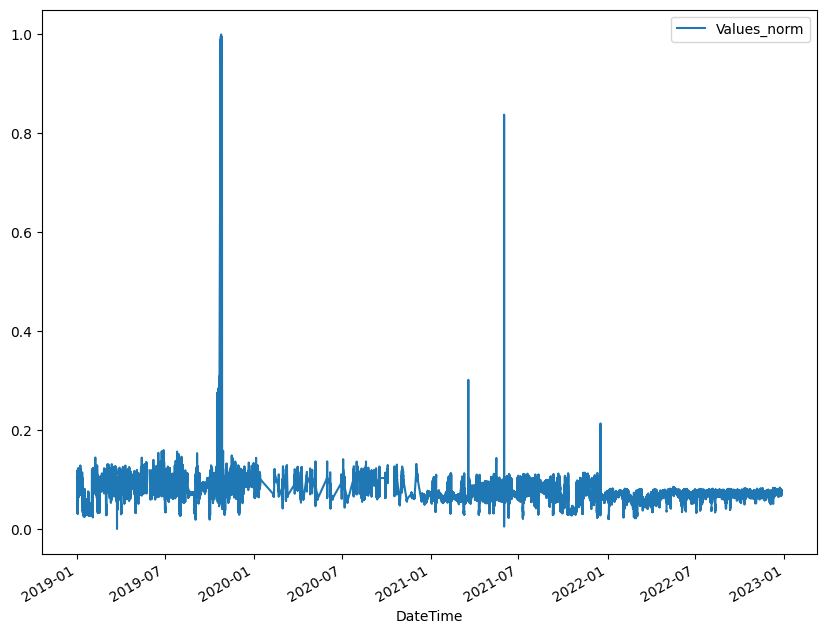

In [10]:
ny_df.plot(subplots = True)

In [11]:
ny_df = ny_df.resample('H').mean()

In [12]:
ny_df['Values_norm']= ny_df['Values_norm'].fillna(method = 'ffill')

In [13]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [14]:
printStats(ny_df)

Rows     : 34931
Columns  : 1

 Features 
 ['Values_norm']

 Missing Values 
 Values_norm    False
dtype: bool

 Unique Values 
 Values_norm    25580
dtype: int64


In [15]:
from prophet import Prophet

In [16]:
ny_df_final = ny_df.reset_index()[['DateTime','Values_norm']].rename({'DateTime':'ds','Values_norm':'y'}, axis='columns')

In [17]:
ny_df_final.head(2)

ds         y
0 2019-01-01 00:00:00  0.104335
1 2019-01-01 01:00:00  0.104335

In [18]:
train = ny_df_final[(ny_df_final['ds']>='2019-01-01') & (ny_df_final['ds']<='2021-12-31')]
test = ny_df_final[(ny_df_final['ds']>'2022-01-1')]

In [19]:
train.shape

(26281, 2)

In [20]:
test.shape

(8626, 2)

In [21]:
m = Prophet(interval_width=0.95) #confidence interval is 95%

In [22]:
m.fit(train)

09:39:11 - cmdstanpy - INFO - Chain [1] start processing
09:39:26 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
m.params

OrderedDict([('lp__', array([[65955.6]])),
             ('k', array([[0.243102]])),
             ('m', array([[0.0726659]])),
             ('delta',
              array([[ 1.05099e-03, -1.95350e-01, -9.67214e-07, -1.08521e-01,
                      -1.41175e-01,  3.64494e-08,  3.07503e+00, -2.84827e+00,
                      -1.88857e+00,  1.83512e+00, -3.39690e-01,  1.67914e-06,
                       4.92092e-05, -2.61143e-07,  4.33954e-01,  8.04301e-01,
                       2.80786e-06, -1.54599e+00,  5.28713e-01, -1.82352e-01,
                       1.36814e-04,  1.09104e-01,  2.29560e-01,  1.21592e-05,
                       8.90197e-02]])),
             ('sigma_obs', array([[0.048774]])),
             ('beta',
              array([[ 6.13948e-03, -1.19432e-02,  7.42262e-04,  4.54385e-04,
                      -1.30545e-03, -2.74604e-03,  5.09361e-03, -1.21828e-03,
                       9.92071e-04,  7.20860e-03, -6.05274e-03,  5.49121e-03,
                      -7.55727e-03, -8

In [32]:

future = m.make_future_dataframe(periods=8670, freq='H')

In [33]:
future.tail()

ds
34946 2022-12-27 02:00:00
34947 2022-12-27 03:00:00
34948 2022-12-27 04:00:00
34949 2022-12-27 05:00:00
34950 2022-12-27 06:00:00

In [34]:
forecast = m.predict(future)

In [35]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

ds      yhat  yhat_lower  yhat_upper
34931 2022-12-26 11:00:00  0.103065   -0.805139    0.981315
34932 2022-12-26 12:00:00  0.102922   -0.792702    0.966627
34933 2022-12-26 13:00:00  0.103021   -0.785529    0.974283
34934 2022-12-26 14:00:00  0.103193   -0.831100    0.989375
34935 2022-12-26 15:00:00  0.103222   -0.768971    0.951304
34936 2022-12-26 16:00:00  0.103043   -0.815581    0.991301
34937 2022-12-26 17:00:00  0.102792   -0.831136    0.994082
34938 2022-12-26 18:00:00  0.102680   -0.802853    1.004979
34939 2022-12-26 19:00:00  0.102808   -0.802080    0.969340
34940 2022-12-26 20:00:00  0.103105   -0.848055    0.997662
34941 2022-12-26 21:00:00  0.103413   -0.797775    0.987199
34942 2022-12-26 22:00:00  0.103629   -0.778615    1.017021
34943 2022-12-26 23:00:00  0.103761   -0.808631    0.997611
34944 2022-12-27 00:00:00  0.103863   -0.813203    0.989757
34945 2022-12-27 01:00:00  0.103943   -0.813757    0.946816
34946 2022-12-27 02:00:00  0.103956   -0.807090    0.977910
34947 2022-12-27 03:00:00  0.103889   -0.799446    0.961666
34948 2022-12-27 04:00:00  0.103831   -0.797090    0.995164
34949 2022-12-27 05:00:00  0.103930   -0.806156    0.982740
34950 2022-12-27 06:00:00  0.104253   -0.820842    0.977808

<AxesSubplot:xlabel='ds'>

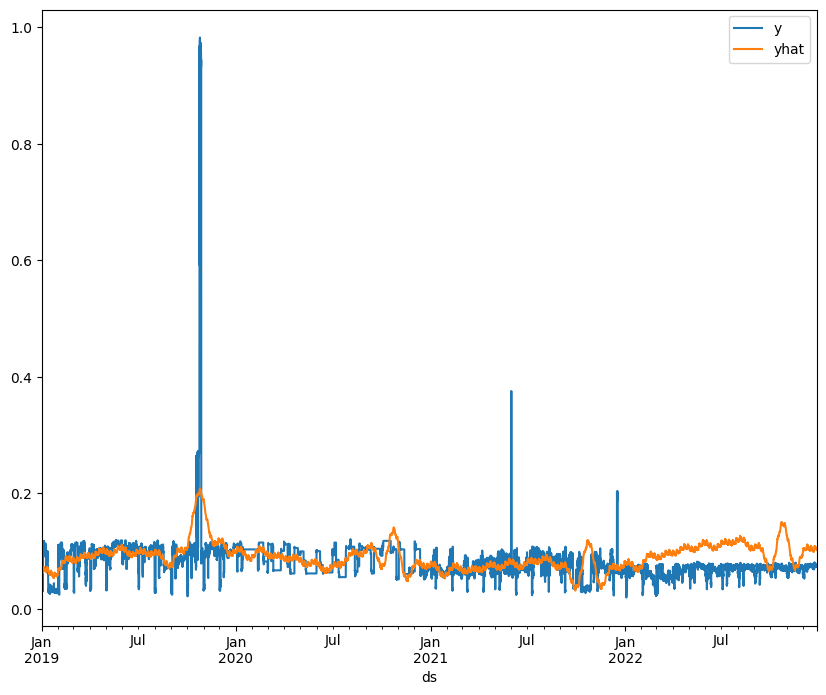

In [36]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [37]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).tail(50)

y      yhat
ds                                     
2022-12-25 05:00:00  0.074502  0.106052
2022-12-25 06:00:00  0.075350  0.106217
2022-12-25 07:00:00  0.075195  0.106491
2022-12-25 08:00:00  0.074969  0.106638
2022-12-25 09:00:00  0.075934  0.106478
2022-12-25 10:00:00  0.074986  0.106050
2022-12-25 11:00:00  0.075585  0.105581
2022-12-25 12:00:00  0.074824  0.105298
2022-12-25 13:00:00  0.074664  0.105241
2022-12-25 14:00:00  0.073812  0.105243
2022-12-25 15:00:00  0.073370  0.105090
2022-12-25 16:00:00  0.074773  0.104718
2022-12-25 17:00:00  0.075044  0.104266
2022-12-25 18:00:00  0.074592  0.103945
2022-12-25 19:00:00  0.074296  0.103860
2022-12-25 20:00:00  0.073919  0.103942
2022-12-25 21:00:00  0.073755  0.104033
2022-12-25 22:00:00  0.074214  0.104035
2022-12-25 23:00:00  0.074471  0.103957
2022-12-26 00:00:00  0.074616  0.103855
2022-12-26 01:00:00  0.075664  0.103740
2022-12-26 02:00:00  0.075346  0.103568
2022-12-26 03:00:00  0.075637  0.103328
2022-12-26 04:00:00  0.076860  0.103111
2022-12-26 05:00:00  0.077404  0.103066
2022-12-26 06:00:00  0.077776  0.103263
2022-12-26 07:00:00  0.077449  0.103588
2022-12-26 08:00:00  0.077123  0.103803
2022-12-26 09:00:00  0.076338  0.103732
2022-12-26 10:00:00  0.073295  0.103410
2022-12-26 11:00:00       NaN  0.103065
2022-12-26 12:00:00       NaN  0.102922
2022-12-26 13:00:00       NaN  0.103021
2022-12-26 14:00:00       NaN  0.103193
2022-12-26 15:00:00       NaN  0.103222
2022-12-26 16:00:00       NaN  0.103043
2022-12-26 17:00:00       NaN  0.102792
2022-12-26 18:00:00       NaN  0.102680
2022-12-26 19:00:00       NaN  0.102808
2022-12-26 20:00:00       NaN  0.103105
2022-12-26 21:00:00       NaN  0.103413
2022-12-26 22:00:00       NaN  0.103629
2022-12-26 23:00:00       NaN  0.103761
2022-12-27 00:00:00       NaN  0.103863
2022-12-27 01:00:00       NaN  0.103943
2022-12-27 02:00:00       NaN  0.103956
2022-12-27 03:00:00       NaN  0.103889
2022-12-27 04:00:00       NaN  0.103831
2022-12-27 05:00:00       NaN  0.103930
2022-12-27 06:00:00       NaN  0.104253

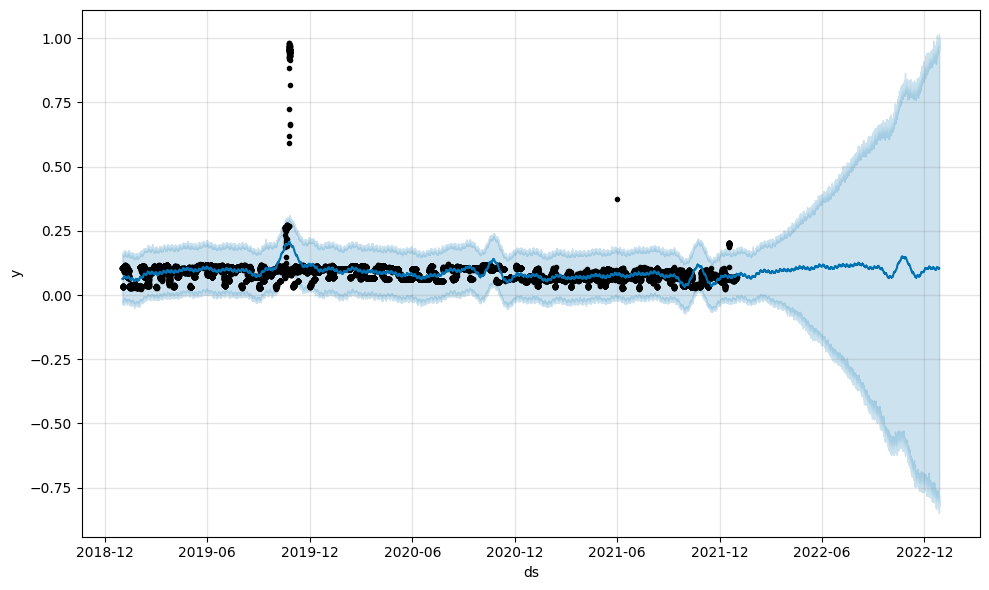

In [38]:
fig1 = m.plot(forecast)
#95% Confidence interval is the light blue color
#the black dots are actual values 
#the dark blue is the y_hat or forecasted value

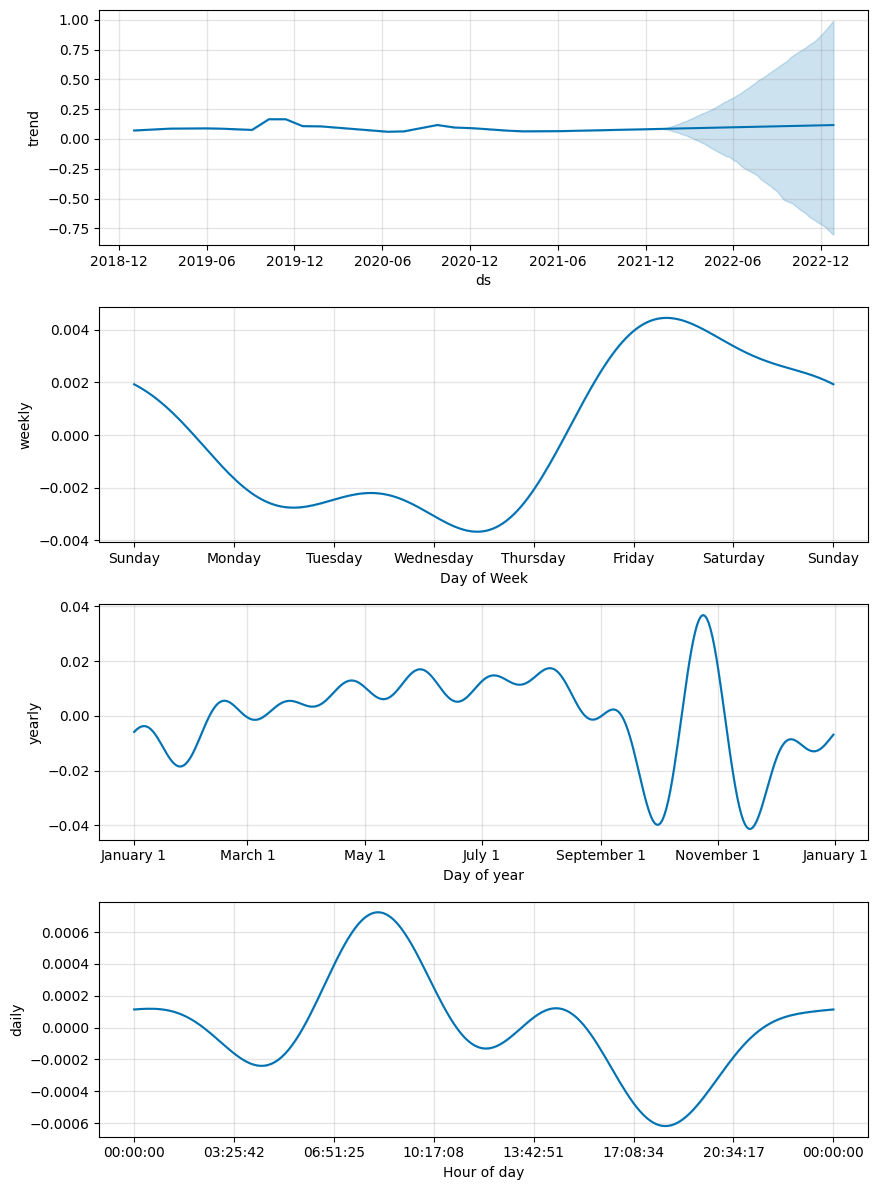

In [39]:
fig2 = m.plot_components(forecast)

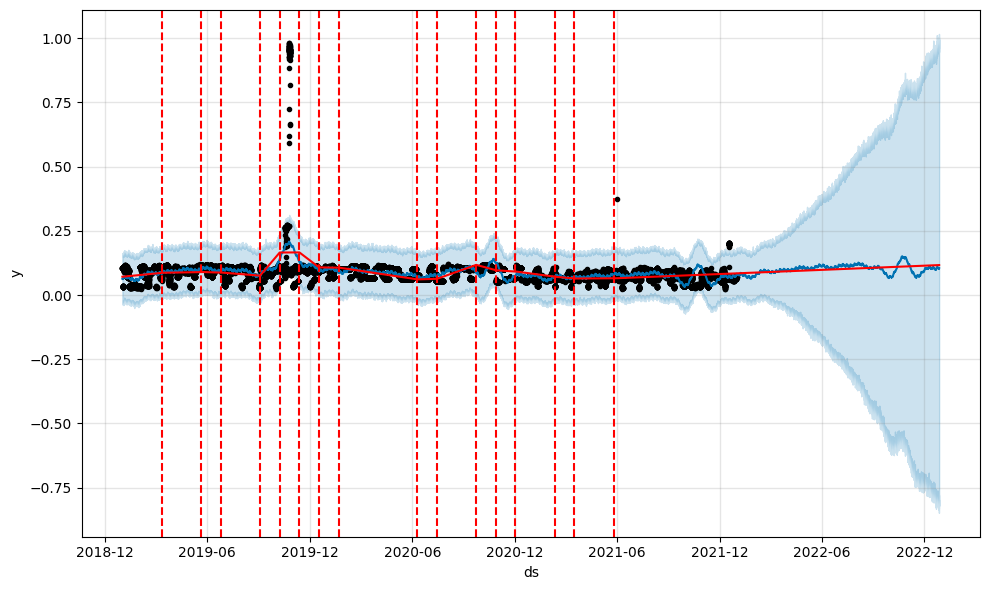

In [40]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

In [41]:
deltas = m.params['delta'].mean(0)
deltas

array([ 1.05099e-03, -1.95350e-01, -9.67214e-07, -1.08521e-01,
       -1.41175e-01,  3.64494e-08,  3.07503e+00, -2.84827e+00,
       -1.88857e+00,  1.83512e+00, -3.39690e-01,  1.67914e-06,
        4.92092e-05, -2.61143e-07,  4.33954e-01,  8.04301e-01,
        2.80786e-06, -1.54599e+00,  5.28713e-01, -1.82352e-01,
        1.36814e-04,  1.09104e-01,  2.29560e-01,  1.21592e-05,
        8.90197e-02])

In [42]:

range(len(deltas))

range(0, 25)

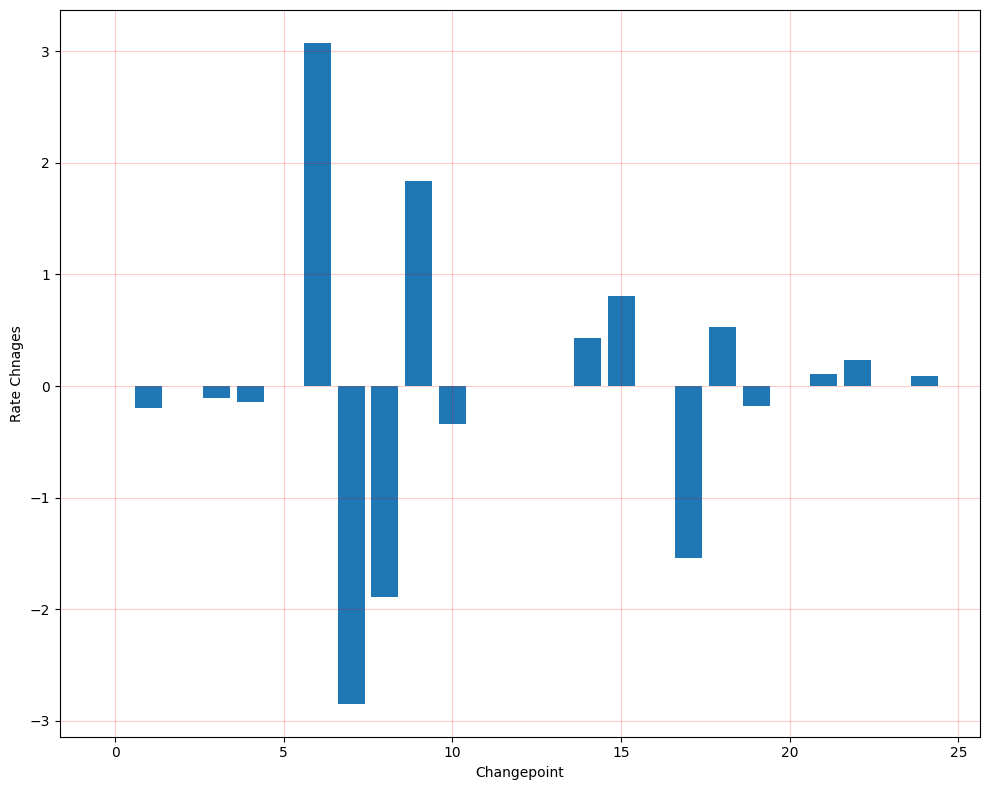

In [43]:

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)),deltas)
ax.grid(True,which='major',c='red',ls='-',alpha=0.2)
ax.set_ylabel('Rate Chnages')
ax.set_xlabel('Changepoint')
fig.tight_layout()
#Prophet plots around 25 chnage points
     

In [44]:

m.changepoints

841     2019-02-05 01:00:00
1682    2019-03-12 02:00:00
2523    2019-04-16 03:00:00
3364    2019-05-21 04:00:00
4205    2019-06-25 05:00:00
5046    2019-07-30 06:00:00
5886    2019-09-03 06:00:00
6727    2019-10-08 07:00:00
7568    2019-11-12 08:00:00
8409    2019-12-17 09:00:00
9250    2020-01-21 10:00:00
10091   2020-02-25 11:00:00
10932   2020-03-31 12:00:00
11773   2020-05-05 13:00:00
12614   2020-06-09 14:00:00
13455   2020-07-14 15:00:00
14296   2020-08-18 16:00:00
15137   2020-09-22 17:00:00
15977   2020-10-27 17:00:00
16818   2020-12-01 18:00:00
17659   2021-01-05 19:00:00
18500   2021-02-09 20:00:00
19341   2021-03-16 21:00:00
20182   2021-04-20 22:00:00
21023   2021-05-25 23:00:00
Name: ds, dtype: datetime64[ns]

In [45]:

from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m,forecast) #this returns the plotly figure
py.iplot(fig)

In [46]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation(model = m,initial = '731 hours',horizon='36 hours')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/1418 [00:00<?, ?it/s]09:51:56 - cmdstanpy - INFO - Chain [1] start processing
09:51:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 1/1418 [00:00<10:03,  2.35it/s]09:51:56 - cmdstanpy - INFO - Chain [1] start processing
09:51:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 2/1418 [00:00<08:57,  2.63it/s]09:51:56 - cmdstanpy - INFO - Chain [1] start processing
09:51:56 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 3/1418 [00:01<08:31,  2.77it/s]09:51:57 - cmdstanpy - INFO - Chain [1] start processing
09:51:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 4/1418 [00:01<08:19,  2.83it/s]09:51:57 - cmdstanpy - INFO - Chain [1] start processing
09:51:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 5/1418 [00:01<08:13,  2.86it/s]09:51:57 - cmdstanpy - INFO - Chain [1] start proce

In [ ]:
cv_results.head(5)

In [ ]:

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p